In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization

In [2]:
df = pd.read_csv("C:/Users/premt/OneDrive/Desktop/Data Analytics course/Python Projects/Engineering Placement Prediction/collegePlace.csv")

In [3]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [4]:
df.shape

(2966, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [6]:
df.isna().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [7]:
df.Stream.unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

<Axes: xlabel='Stream', ylabel='PlacedOrNot'>

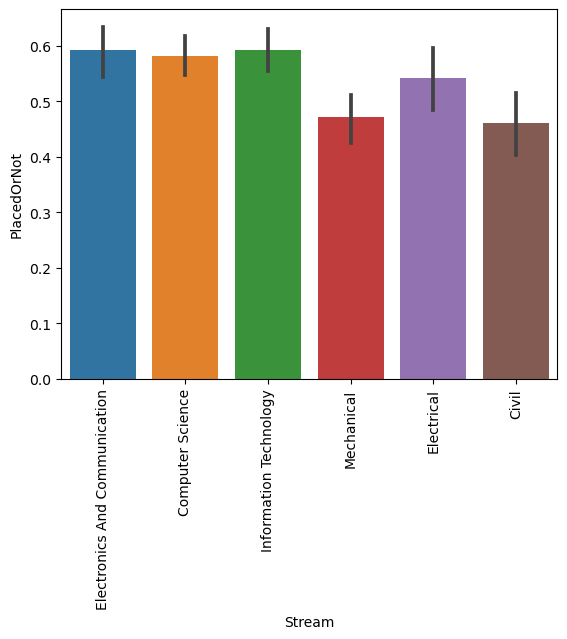

In [8]:
plt.xticks(rotation = 90)
sns.barplot(x = df.Stream, y = df.PlacedOrNot)

In [9]:
df.Age.unique()

array([22, 21, 23, 24, 28, 30, 25, 26, 20, 19, 29], dtype=int64)

<Axes: xlabel='Age', ylabel='PlacedOrNot'>

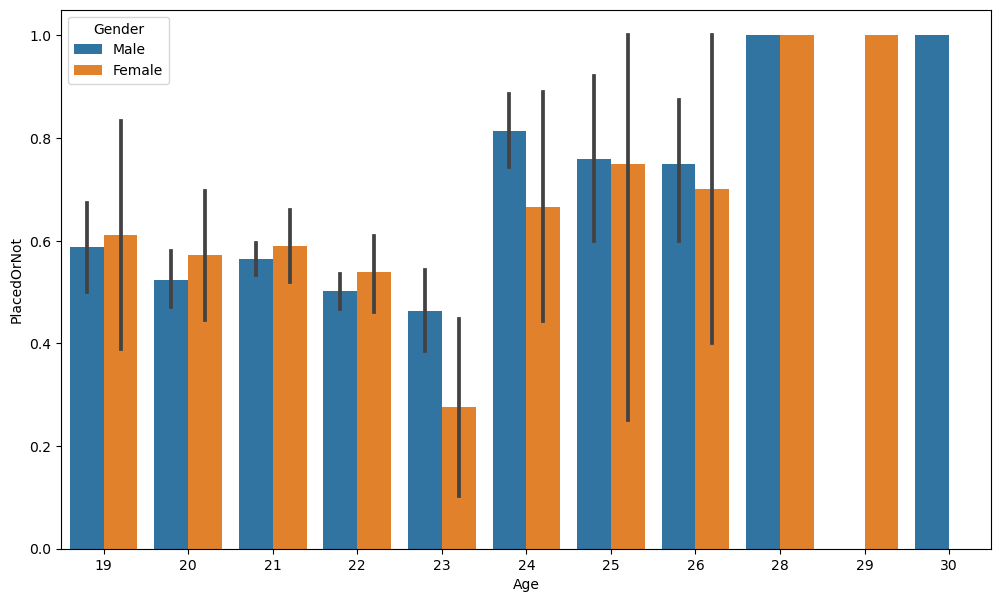

In [10]:
plt.figure(figsize = (12,7))
sns.barplot(x = df.Age, y = df.PlacedOrNot, hue = df.Gender)

<Axes: xlabel='Age', ylabel='count'>

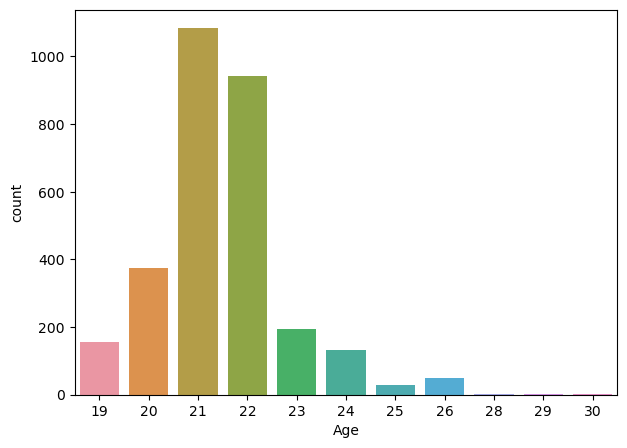

In [11]:
plt.figure(figsize = (7,5))
sns.countplot(x = df.Age)

In [12]:
df.Age.value_counts()

21    1084
22     941
20     375
23     195
19     156
24     131
26      50
25      29
28       3
30       1
29       1
Name: Age, dtype: int64

<Axes: xlabel='Internships', ylabel='PlacedOrNot'>

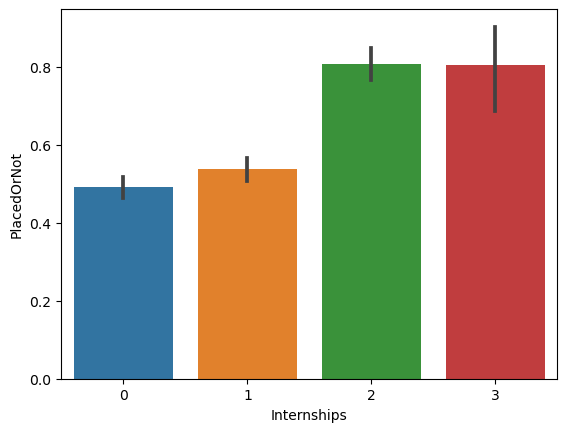

In [13]:
sns.barplot(x = df.Internships, y = df.PlacedOrNot)

In [14]:
df.Internships.value_counts()

0    1331
1    1234
2     350
3      51
Name: Internships, dtype: int64

In [15]:
df.CGPA.value_counts()

7    956
8    915
6    834
9    165
5     96
Name: CGPA, dtype: int64

<Axes: xlabel='CGPA', ylabel='PlacedOrNot'>

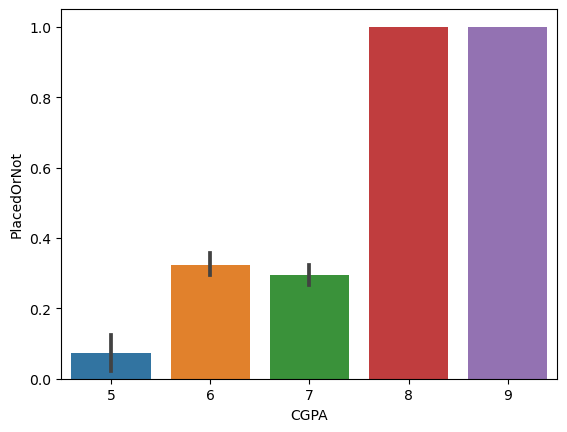

In [16]:
sns.barplot(x = df.CGPA, y = df.PlacedOrNot)

<Axes: xlabel='Hostel', ylabel='PlacedOrNot'>

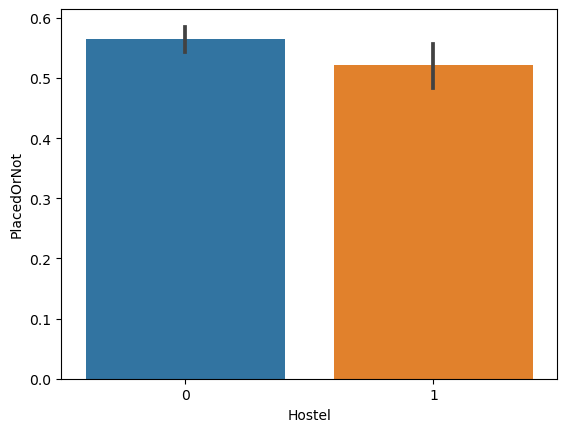

In [17]:
sns.barplot(x = df.Hostel, y = df.PlacedOrNot)

<Axes: xlabel='Gender', ylabel='PlacedOrNot'>

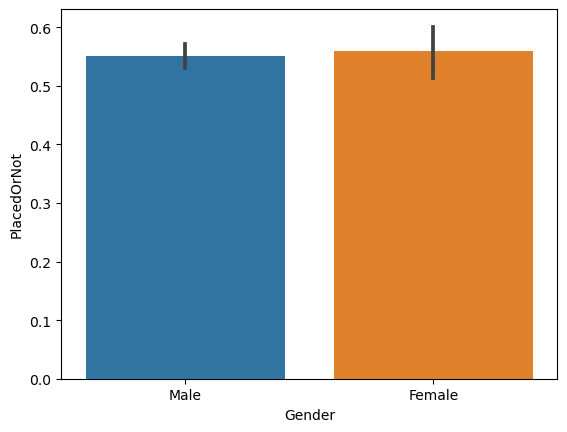

In [18]:
sns.barplot(x = df.Gender, y = df.PlacedOrNot)

<Axes: xlabel='HistoryOfBacklogs', ylabel='PlacedOrNot'>

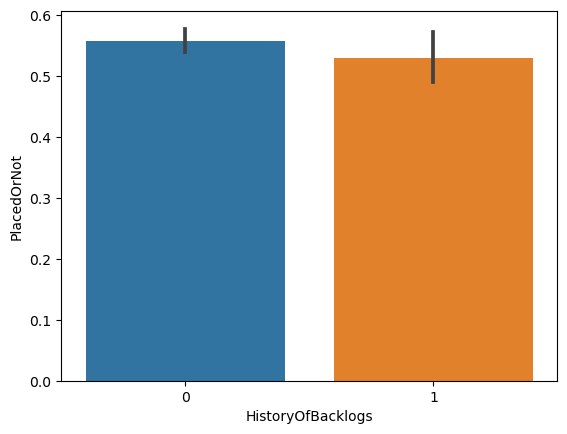

In [19]:
sns.barplot(x = df.HistoryOfBacklogs, y = df.PlacedOrNot)

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
df.Gender = le.fit_transform(df.Gender)
df.Stream = le.fit_transform(df.Stream)

In [22]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1


In [23]:
x = df.drop(['PlacedOrNot'], axis = 1)

In [24]:
y = df.PlacedOrNot

In [25]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
cross_val_score(SVC(),x, y, cv = 3)

array([0.73609707, 0.76238625, 0.84817814])

In [28]:
cross_val_score(DecisionTreeClassifier(), x, y, cv = 3)

array([0.84428716, 0.84024267, 0.90789474])

In [29]:
cross_val_score(LogisticRegression(), x, y, cv = 3)

array([0.71991911, 0.74823054, 0.83704453])

In [30]:
cross_val_score(RandomForestClassifier(n_estimators=50), x, y, cv = 3)

array([0.84833165, 0.85237614, 0.90384615])

In [31]:
cross_val_score(KNeighborsClassifier(),x, y ,cv = 3)

array([0.82912032, 0.81193124, 0.88259109])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [33]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<Axes: >

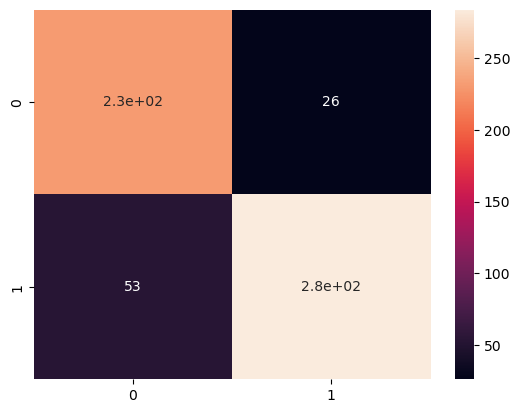

In [36]:
sns.heatmap(cm, annot = True)

In [37]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 0.9279089376053963
Testing Accuracy : 0.867003367003367
